In [1]:
#Professor Insight Word Map for RateMyProfessor 
#5 Main Objectives

#Objective 1: Isolate all comments
#Objective 2: Isolate adjective words and phrases 
#Objective 3: Frequency Analysis
#Objective 4: Generating the Word Map 
#Objective 5: Building the Web Page 

import numpy as np
import requests
import nltk
import collections
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%timeit

In [3]:
#Objective 1: Isolate all comments
#To get all comments I need to find the GET address and query it for all comments. 

##TO DO:
### Find GET address with comment information
### Query address for comment information
### Tie Webpage to a variable set by webform input

#So far I'm able to scrape the html for the first 20 comments


webpage = "http://www.ratemyprofessors.com/ShowRatings.jsp?tid=433738"

with requests.Session() as s:
	s.headers.update({"User-Agent": "Mozilla/5.0 (X11; Linux x86_64)"})
	soup = BeautifulSoup(s.get(webpage).content)
	yes = soup.find_all('p','commentsParagraph')
	#json_data = yes.json()
    
%time

Wall time: 0 ns


c:\users\tare\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\tare\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:

#Objective 2: Isolate adjective words and phrases
text = [i.string for i in yes]
tt = [nltk.word_tokenize(i) for i in text]
ttt = [nltk.pos_tag(i) for i in tt]
%time

Wall time: 0 ns


In [5]:
#Objective 2: Contd.

#TO DO: 
### Find a solution for finding adjective phrases
### Do some filtering on adjective words 

adjs = []
adjs_excl = []
for sent in ttt:
    for word in sent:
        if  (word[1] == 'JJ') or (word[1] == 'JJR') or (word[1] == 'JJS'): 
            adjs.append(word[0])

        
for sent in ttt:
    for word in sent:
        if (word[1] == 'JJ'):
            adjs_excl.append(word[0])
    
adjs_excl



['difficult',
 'everyday',
 'able',
 'good',
 'boyfriend',
 'great',
 'sure',
 'hard',
 'high',
 'first',
 'much',
 'great',
 'other',
 'calc',
 'able',
 'great',
 'Differential',
 'much',
 'horrendous',
 'math-minded',
 'comprehend',
 'long',
 'irrelevant',
 'necessary',
 'winded',
 'good',
 'funny',
 'smart',
 'funny',
 'smart',
 'survivable',
 'few',
 'long',
 'funny',
 'good',
 'amazing',
 'silly',
 'quick',
 'rude',
 'easy',
 'diff',
 'fair',
 'simple',
 'simple',
 'entire',
 'nice',
 'diff',
 'difficult',
 'clear',
 'little',
 'tough',
 'mandatory',
 'extra',
 'calc',
 'good',
 'several',
 'everyday',
 'final',
 'tough',
 'own',
 'same',
 'difficult',
 'good',
 'good',
 'tough',
 'nice',
 'sure',
 'graded',
 'lengthy',
 'possible']

In [6]:
adjs_counted = collections.Counter(adjs_excl).most_common()
adjs_counted

[('good', 6),
 ('difficult', 3),
 ('great', 3),
 ('funny', 3),
 ('tough', 3),
 ('everyday', 2),
 ('able', 2),
 ('sure', 2),
 ('much', 2),
 ('calc', 2),
 ('long', 2),
 ('smart', 2),
 ('diff', 2),
 ('simple', 2),
 ('nice', 2),
 ('boyfriend', 1),
 ('hard', 1),
 ('high', 1),
 ('first', 1),
 ('other', 1),
 ('Differential', 1),
 ('horrendous', 1),
 ('math-minded', 1),
 ('comprehend', 1),
 ('irrelevant', 1),
 ('necessary', 1),
 ('winded', 1),
 ('survivable', 1),
 ('few', 1),
 ('amazing', 1),
 ('silly', 1),
 ('quick', 1),
 ('rude', 1),
 ('easy', 1),
 ('fair', 1),
 ('entire', 1),
 ('clear', 1),
 ('little', 1),
 ('mandatory', 1),
 ('extra', 1),
 ('several', 1),
 ('final', 1),
 ('own', 1),
 ('same', 1),
 ('graded', 1),
 ('lengthy', 1),
 ('possible', 1)]

In [ ]:
#### Tags I've found
#'has compassion for the student'
#'genuinely wants to see students excell and understand the material'
#''

In [59]:
#Objective 4: Generating the Word Map

#TO-DO:
### Learn to Configure worldcloud 

#Wordcloud library seems flexible enough for what I want 
#Lots of Configurations it seems I'm going to have to learn though

#Example code. Far from what I need
wordcloud = WordCloud(font_path='/Users/kunal/Library/Fonts/sans-serif.ttf',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

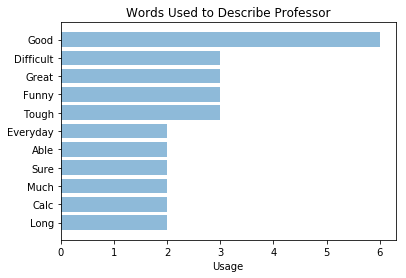

In [35]:
plt_adjs = [adj[0].title() for adj in adjs_counted[0:11]]
y_pos = np.arange(len(plt_adjs))
plt_counts = [adj[1] for adj in adjs_counted[0:11]]


plt.barh(y_pos, plt_counts, align='center', alpha=0.5)

plt.yticks(y_pos, plt_adjs)
plt.xlabel('Usage')
plt.gca().invert_yaxis()



plt.title('Words Used to Describe Professor')
plt.show()

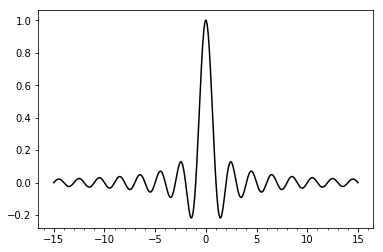